In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning 2023/Data/pokemons.csv')

In [ ]:
df

id         name       rank     generation  evolves_from   type1  \
0        1    bulbasaur   ordinary   generation-i       nothing   grass   
1        2      ivysaur   ordinary   generation-i     bulbasaur   grass   
2        3     venusaur   ordinary   generation-i       ivysaur   grass   
3        4   charmander   ordinary   generation-i       nothing    fire   
4        5   charmeleon   ordinary   generation-i    charmander    fire   
...    ...          ...        ...            ...           ...     ...   
1012  1013    sinistcha   ordinary  generation-ix  poltchageist   grass   
1013  1014      okidogi  legendary  generation-ix       nothing  poison   
1014  1015    munkidori  legendary  generation-ix       nothing  poison   
1015  1016  fezandipiti  legendary  generation-ix       nothing  poison   
1016  1017      ogerpon  legendary  generation-ix       nothing   grass   

         type2  hp  atk  def  spatk  spdef  speed  total  height  weight  \
0       poison  45   49   49     65     65     45    318       7      69   
1       poison  60   62   63     80     80     60    405      10     130   
2       poison  80   82   83    100    100     80    525      20    1000   
3         None  39   52   43     60     50     65    309       6      85   
4         None  58   64   58     80     65     80    405      11     190   
...        ...  ..  ...  ...    ...    ...    ...    ...     ...     ...   
1012     ghost  71   60  106    121     80     70    508       2      22   
1013  fighting  88  128  115     58     86     80    555      18     922   
1014   psychic  88   75   66    130     90    106    555      10     122   
1015     fairy  88   91   82     70    125     99    555      14     301   
1016      None  80  120   84     60     96    110    550      12     398   

                      abilities  \
0         overgrow chlorophyll    
1         overgrow chlorophyll    
2         overgrow chlorophyll    
3            blaze solar-power    
4            blaze solar-power    
...                         ...   
1012     hospitality heatproof    
1013  toxic-chain zero-to-hero    
1014         toxic-chain frisk    
1015    toxic-chain technician    
1016                   defiant    

                                                   desc  
0     A strange seed was planted on its back at birt...  
1     When the bulb on its back grows large, it appe...  
2     The plant blooms when it is absorbing solar en...  
3     Obviously prefers hot places. When it rains, s...  
4     When it swings its burning tail, it elevates t...  
...                                                 ...  
1012                                      Not Available  
1013                                      Not Available  
1014                                      Not Available  
1015                                      Not Available  
1016                                      Not Available  

[1017 rows x 18 columns]

In [ ]:
df.columns

Index(['id', 'name', 'rank', 'generation', 'evolves_from', 'type1', 'type2',
       'hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total', 'height',
       'weight', 'abilities', 'desc'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop(['id','name', 'evolves_from', 'abilities', 'desc','rank','generation','type1','type2'], axis=1)
y = df['name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.0


In [ ]:
prediction = clf.predict([[45,49,49,65,65,45,320,7,70]])
print(prediction)


['bulbasaur']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
df.columns

Index(['id', 'name', 'rank', 'generation', 'evolves_from', 'type1', 'type2',
       'hp', 'atk', 'def', 'spatk', 'spdef', 'speed', 'total', 'height',
       'weight', 'abilities', 'desc'],
      dtype='object')

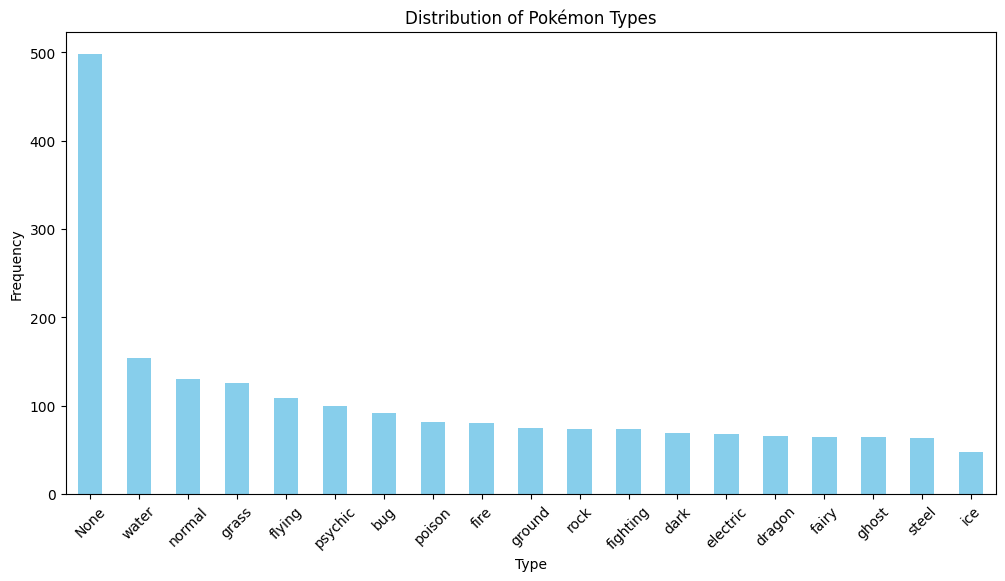

In [ ]:
import matplotlib.pyplot as plt
types = pd.concat([df['type1'], df['type2']]).dropna()
type_counts = types.value_counts()
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Pokémon Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-23-eb44cb81c866>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(type1_counts.index, rotation=90)
<ipython-input-23-eb44cb81c866>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(type2_counts.index, rotation=90)


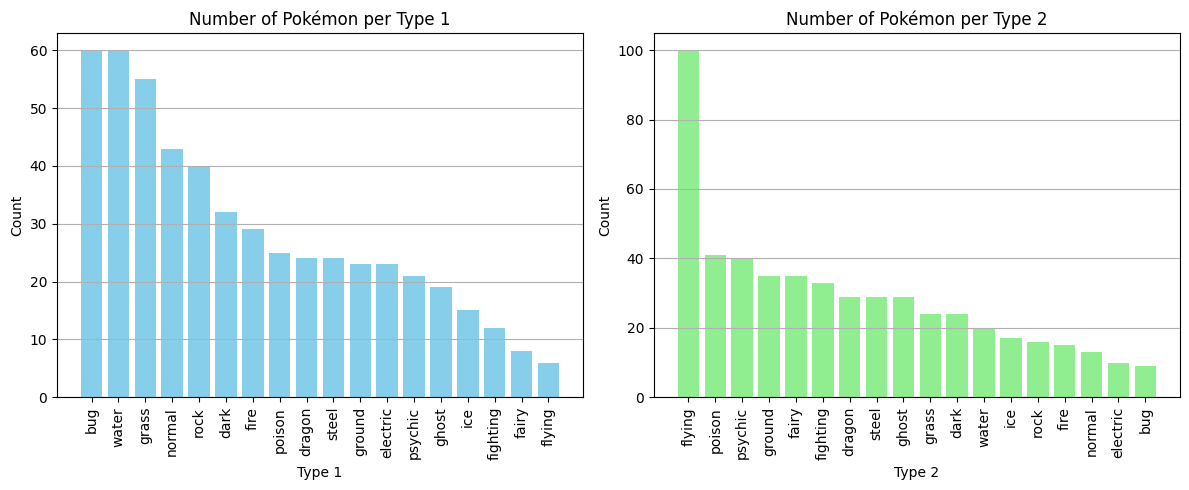

In [ ]:
import matplotlib.pyplot as plt
filtered_df = df[df['type2'] != 'None']
type1_counts = filtered_df['type1'].value_counts()
type2_counts = filtered_df['type2'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.bar(type1_counts.index, type1_counts.values, color='skyblue')
ax1.set_title('Number of Pokémon per Type 1')
ax1.set_xlabel('Type 1')
ax1.set_ylabel('Count')
ax1.set_xticklabels(type1_counts.index, rotation=90)
ax1.grid(axis='y')

ax2.bar(type2_counts.index, type2_counts.values, color='lightgreen')
ax2.set_title('Number of Pokémon per Type 2')
ax2.set_xlabel('Type 2')
ax2.set_ylabel('Count')
ax2.set_xticklabels(type2_counts.index, rotation=90)
ax2.grid(axis='y')

plt.tight_layout()

plt.show()

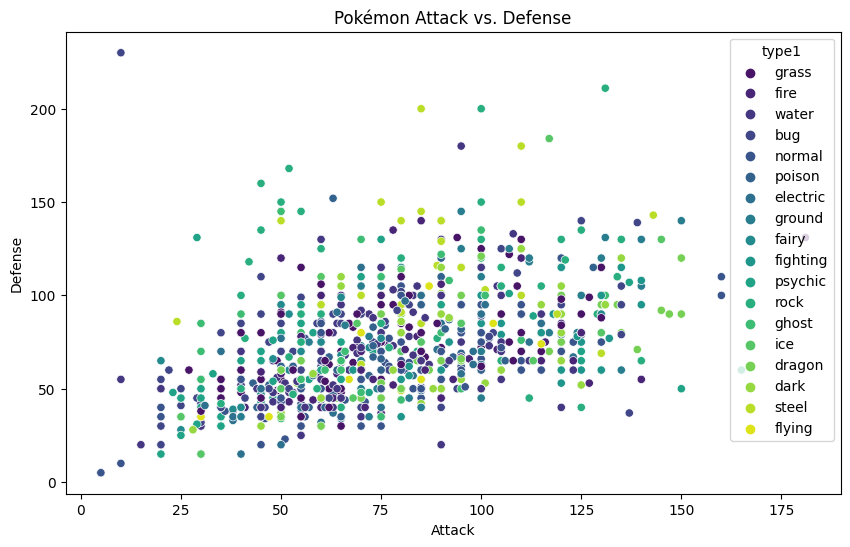

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='atk', y='def', data=df, hue='type1', palette='viridis')
plt.title('Pokémon Attack vs. Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()


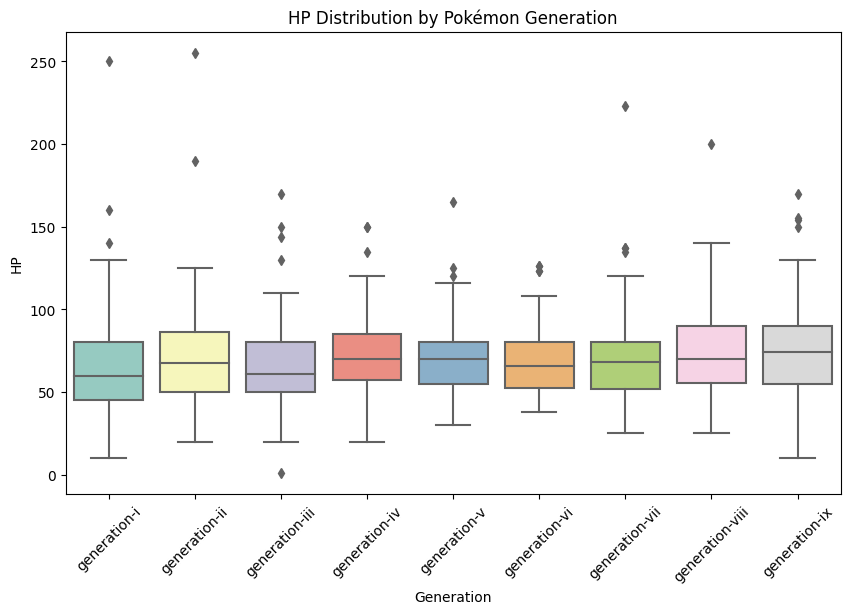

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='generation', y='hp', data=df, palette='Set3')
plt.title('HP Distribution by Pokémon Generation')
plt.xlabel('Generation')
plt.ylabel('HP')
plt.xticks(rotation=45)
plt.show()


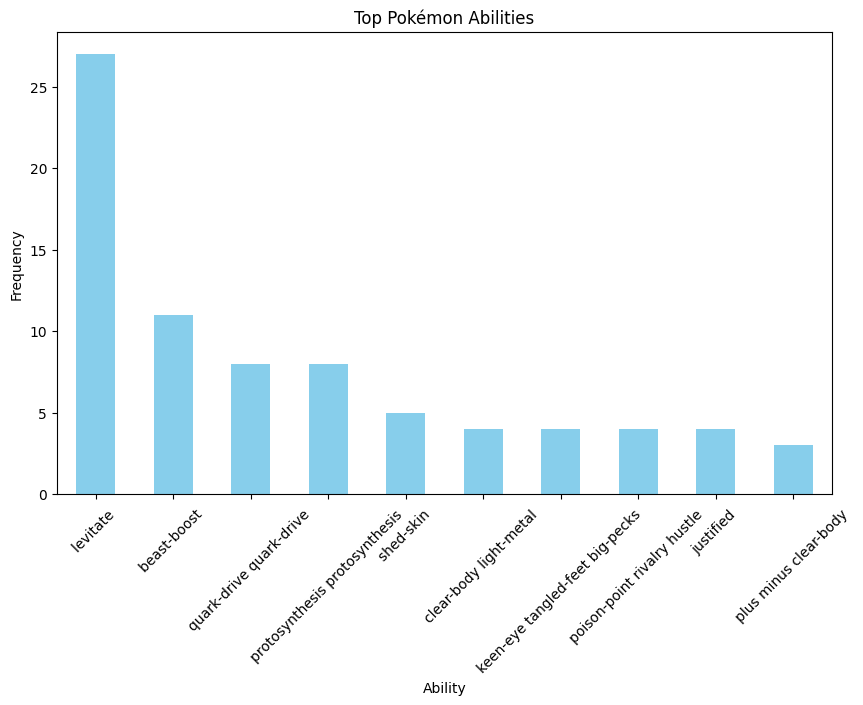

In [ ]:
import matplotlib.pyplot as plt
top_abilities = df['abilities'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_abilities.plot(kind='bar', color='skyblue')
plt.title('Top Pokémon Abilities')
plt.xlabel('Ability')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


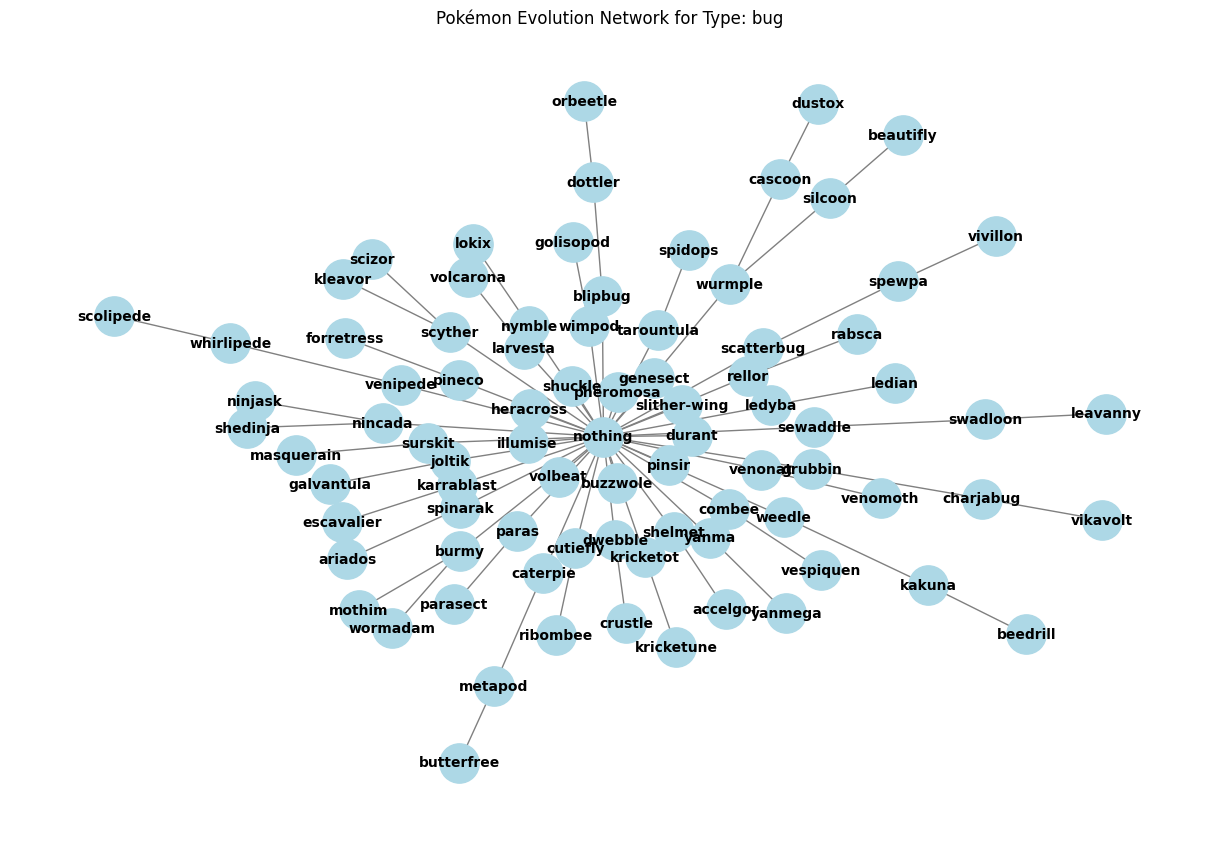

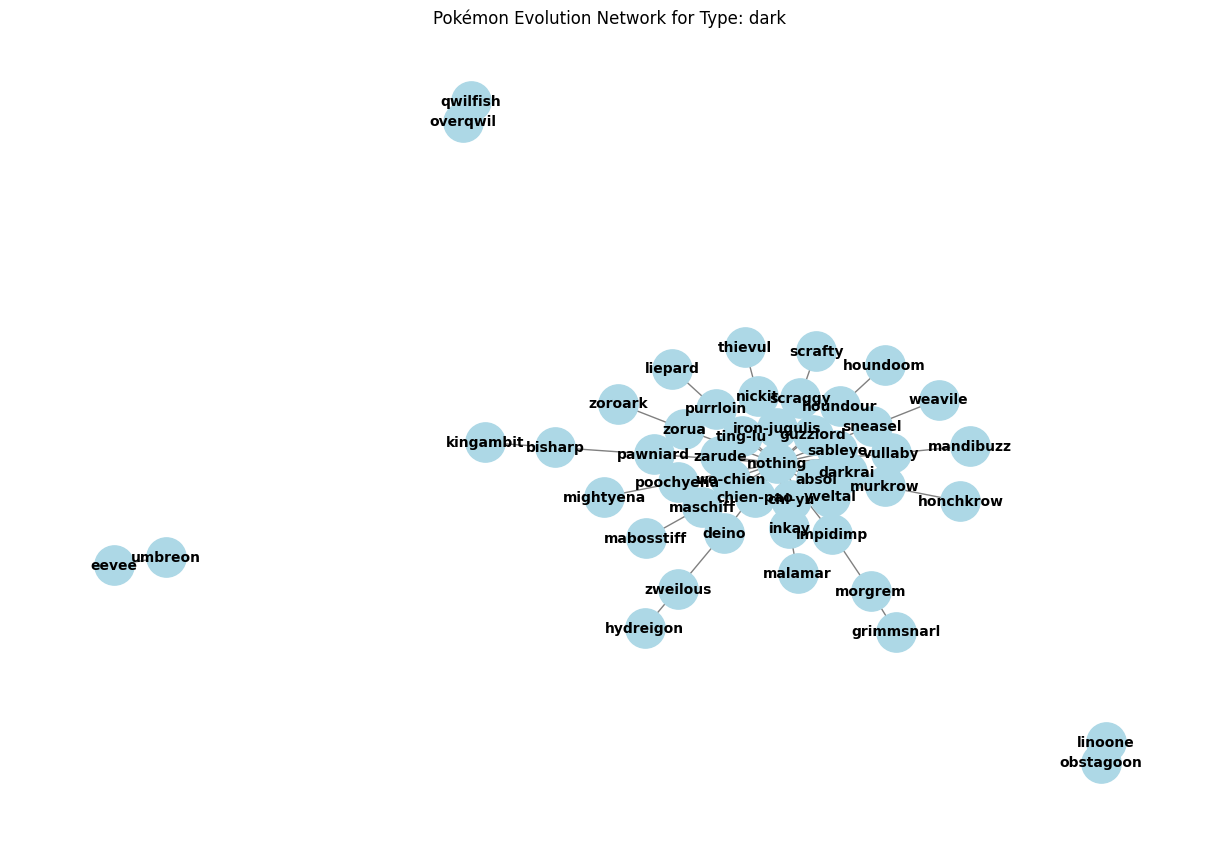

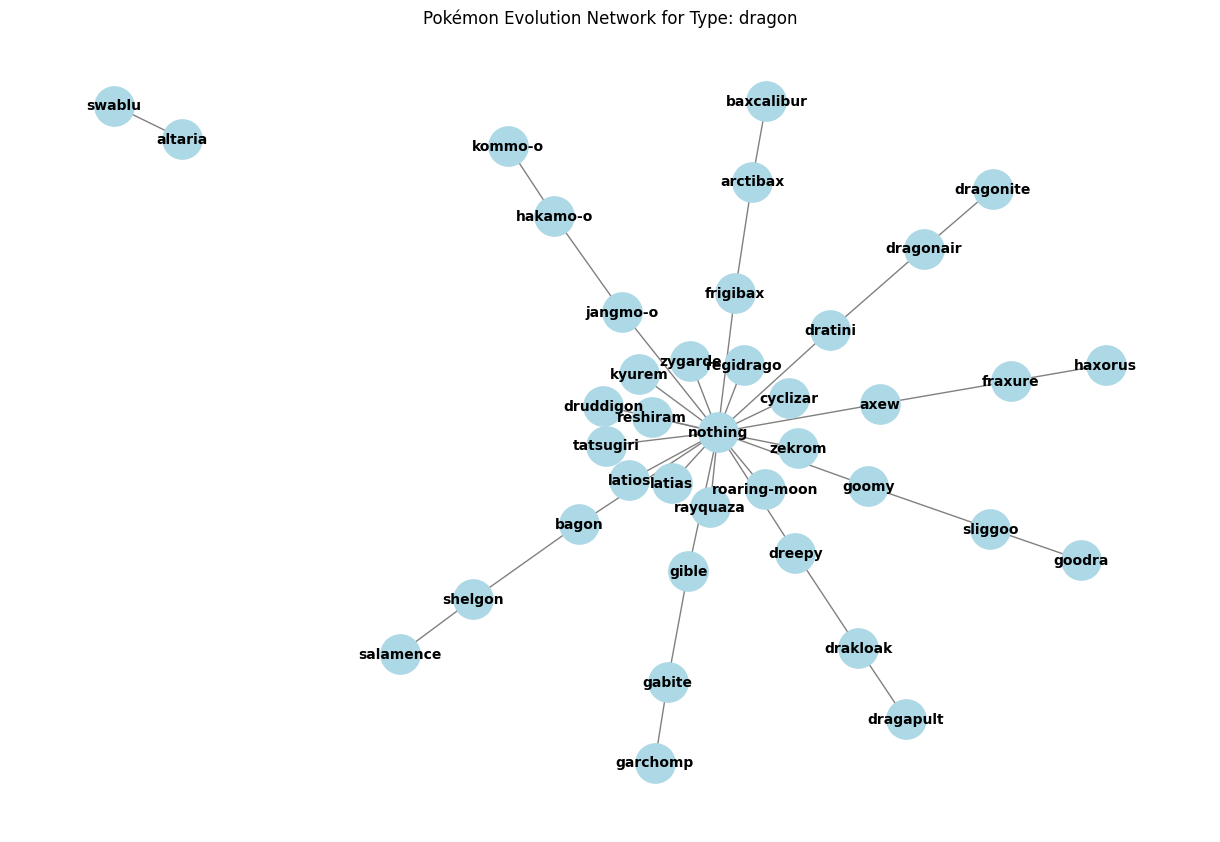

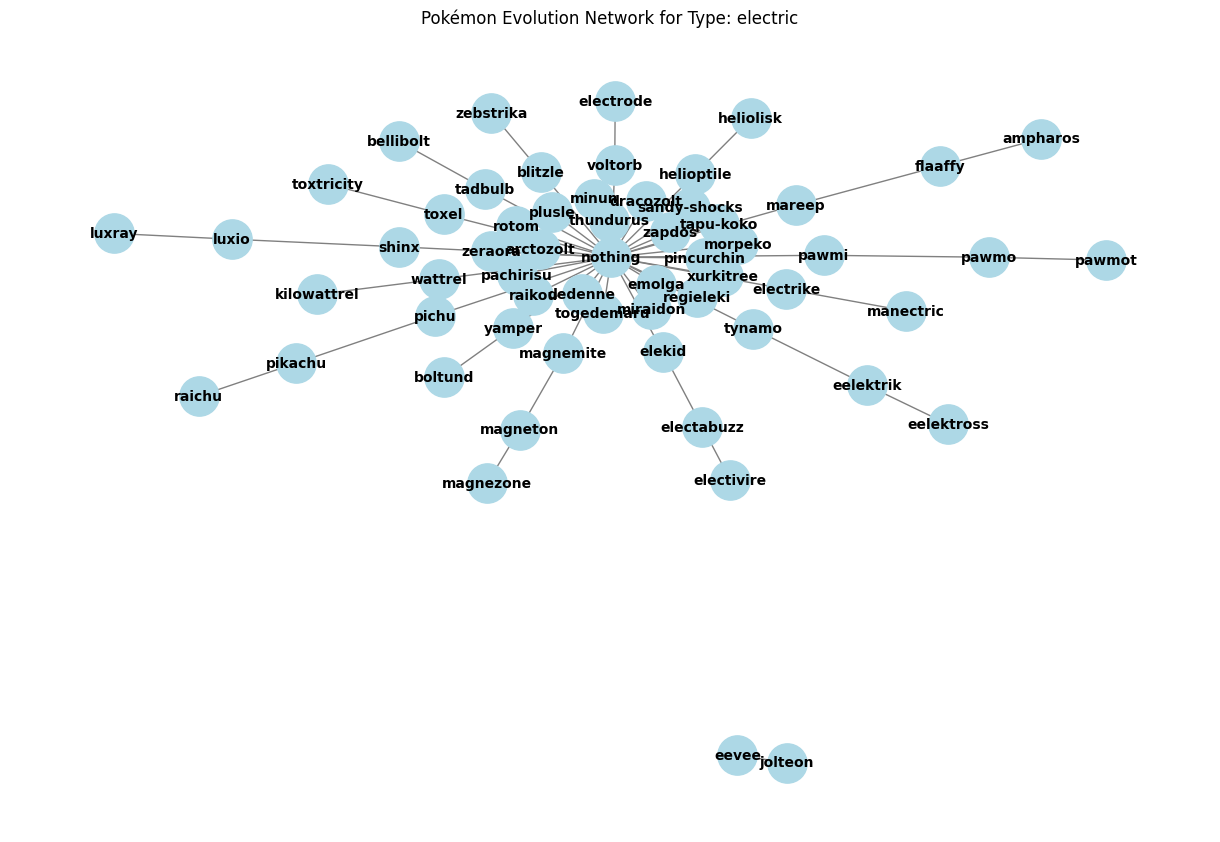

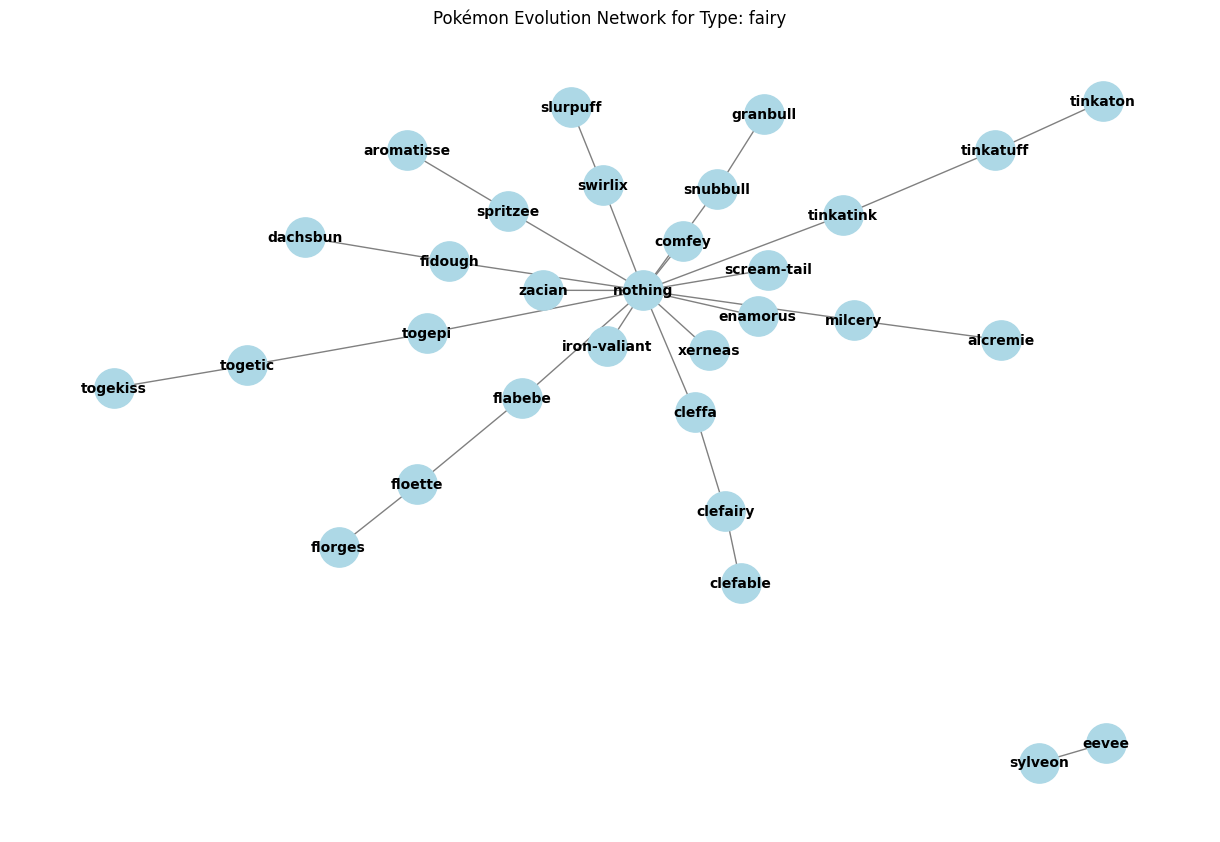

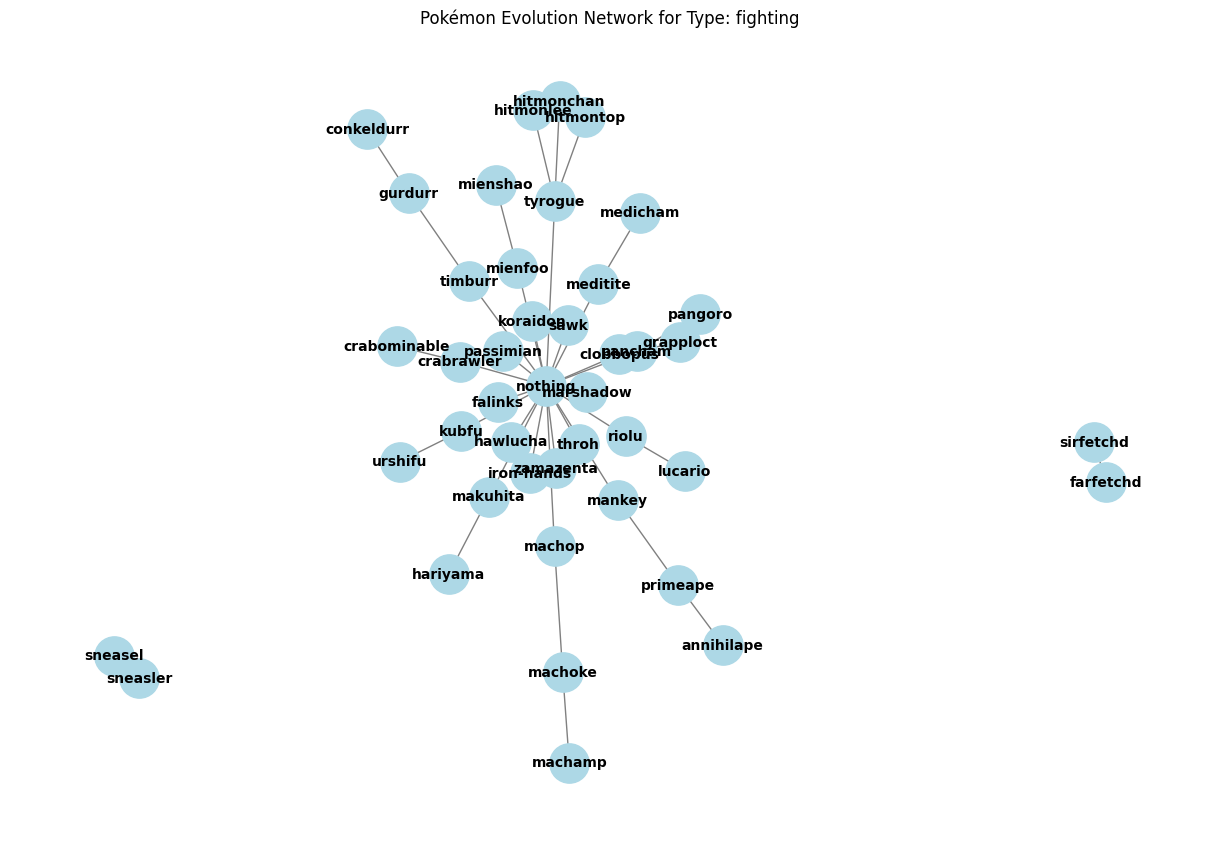

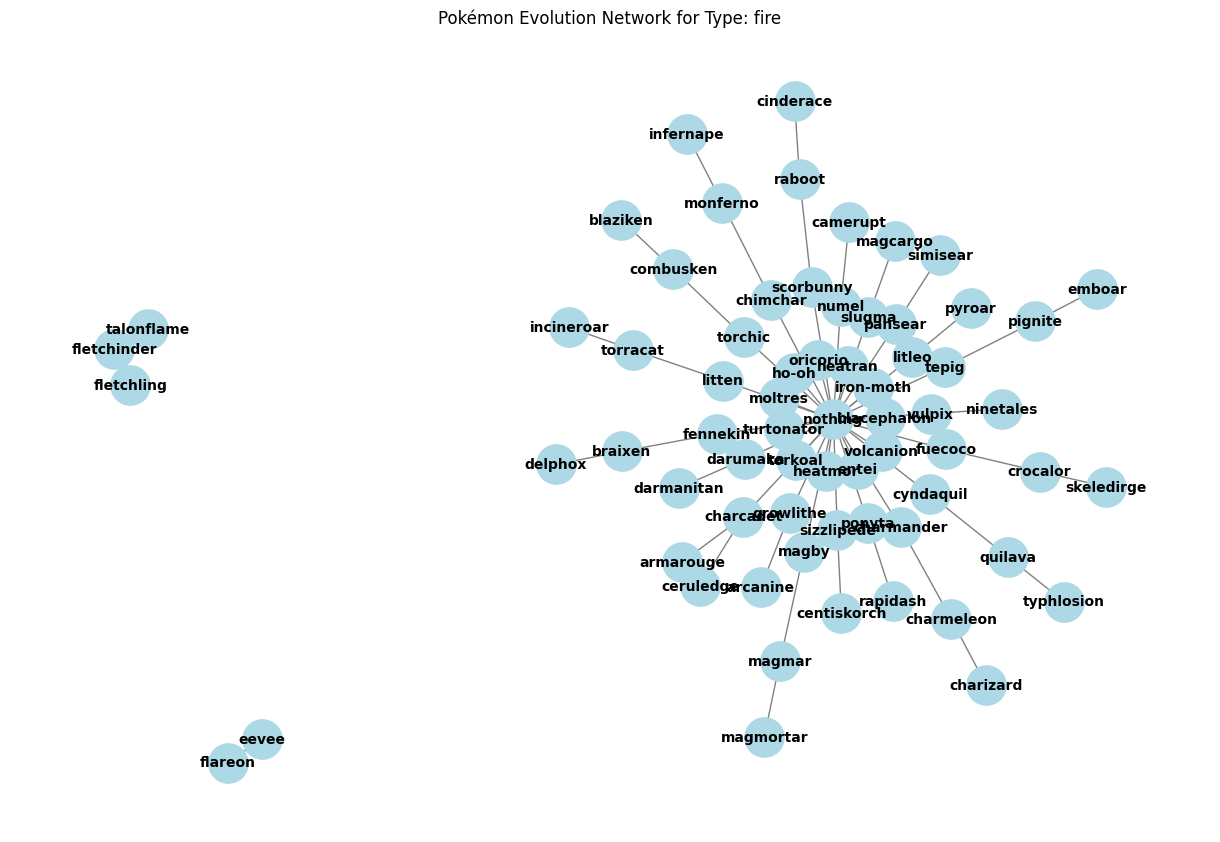

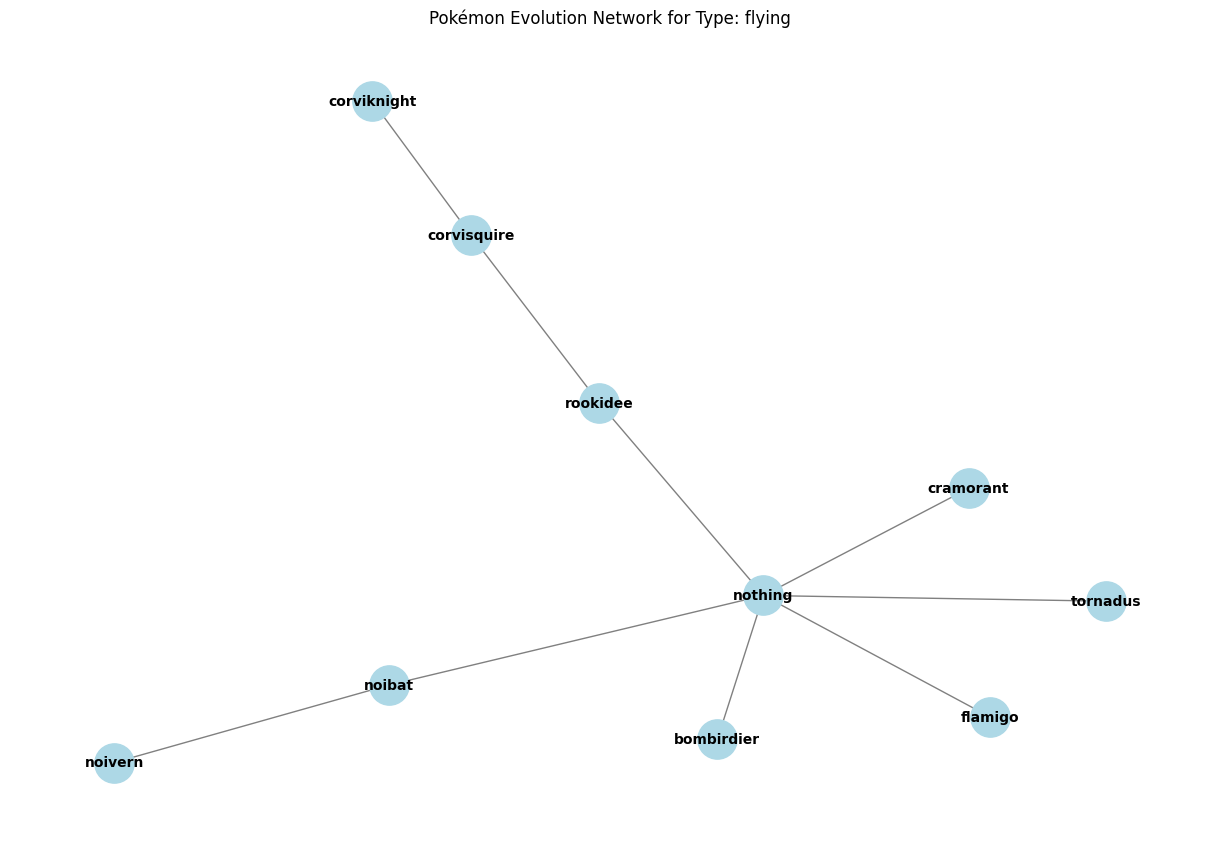

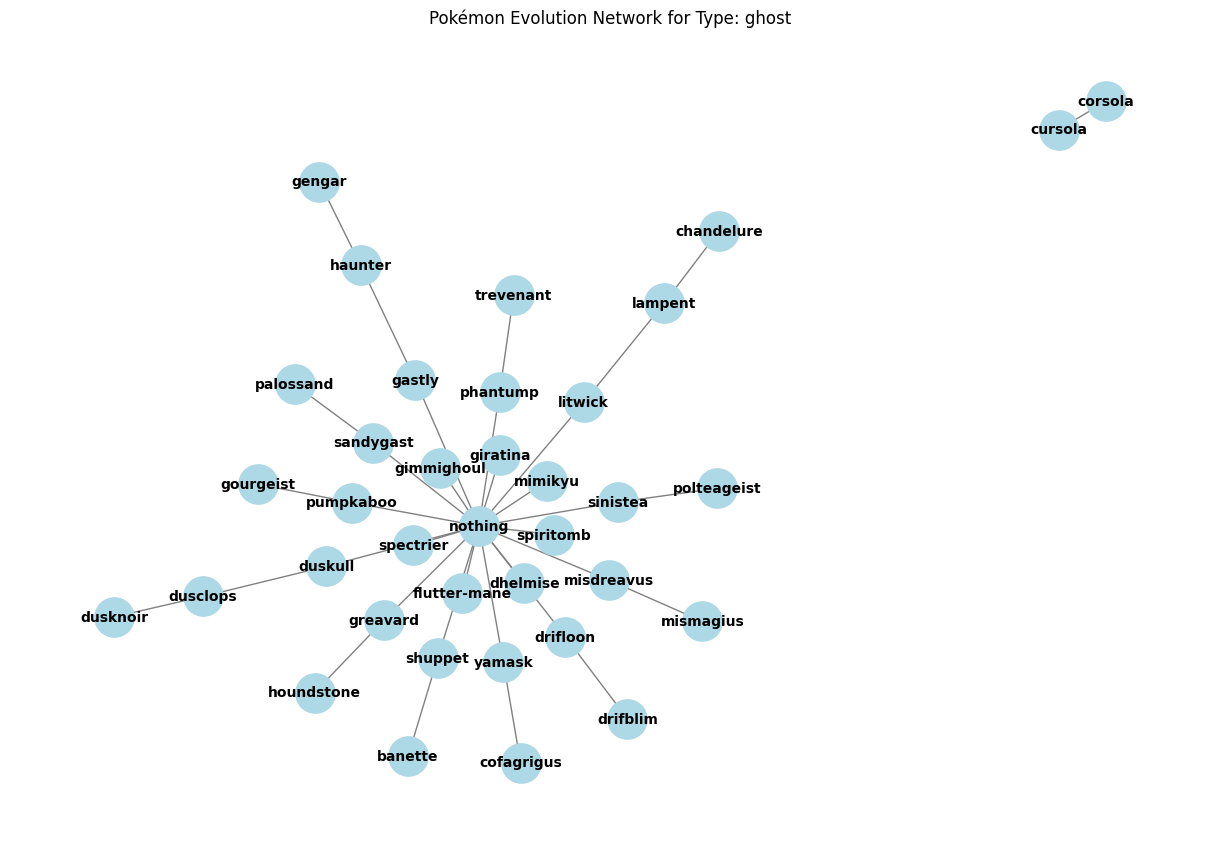

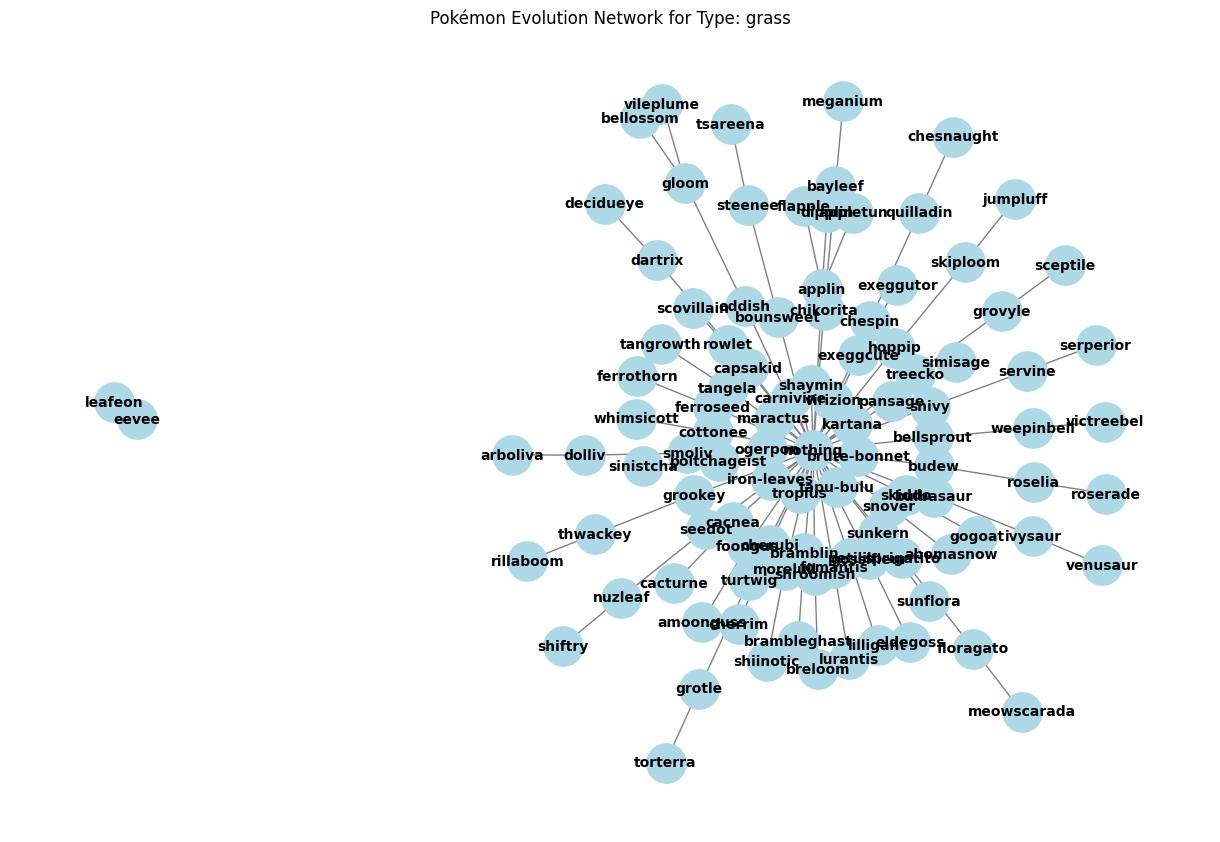

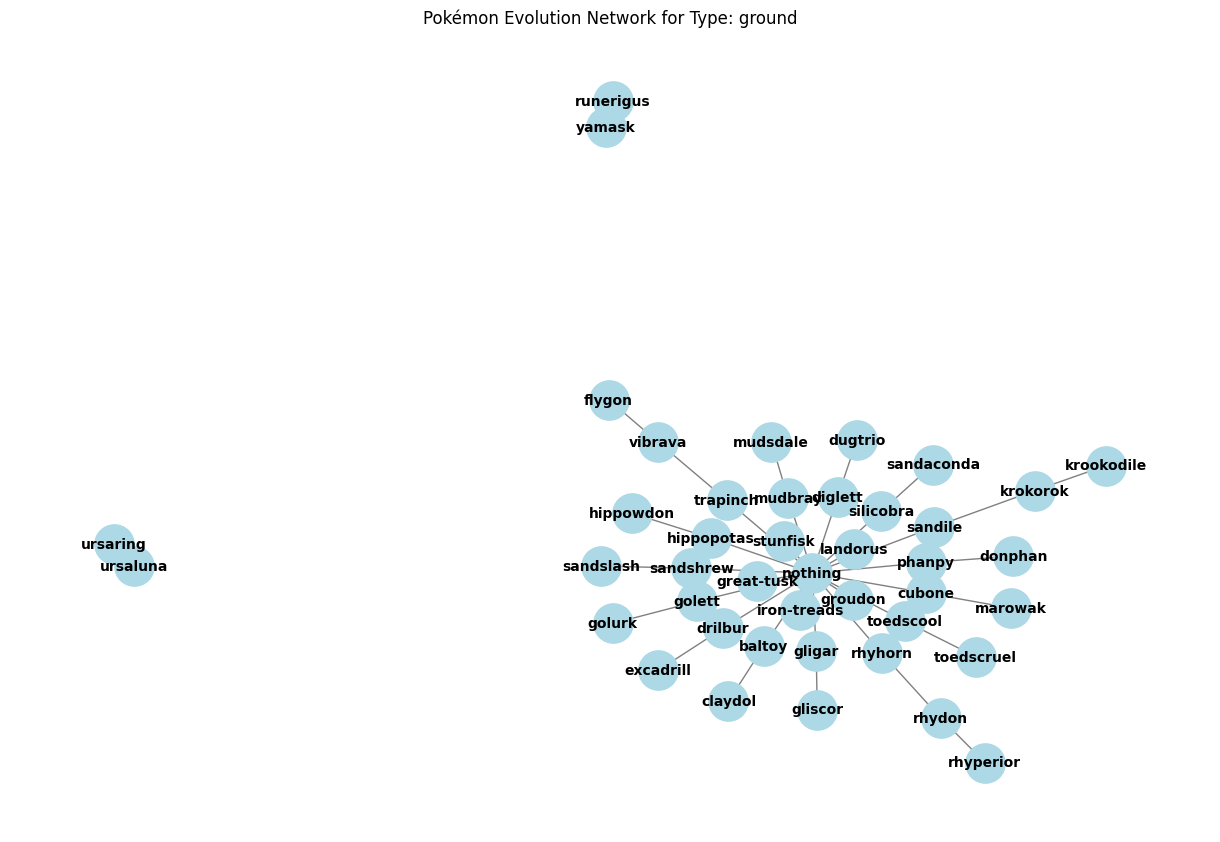

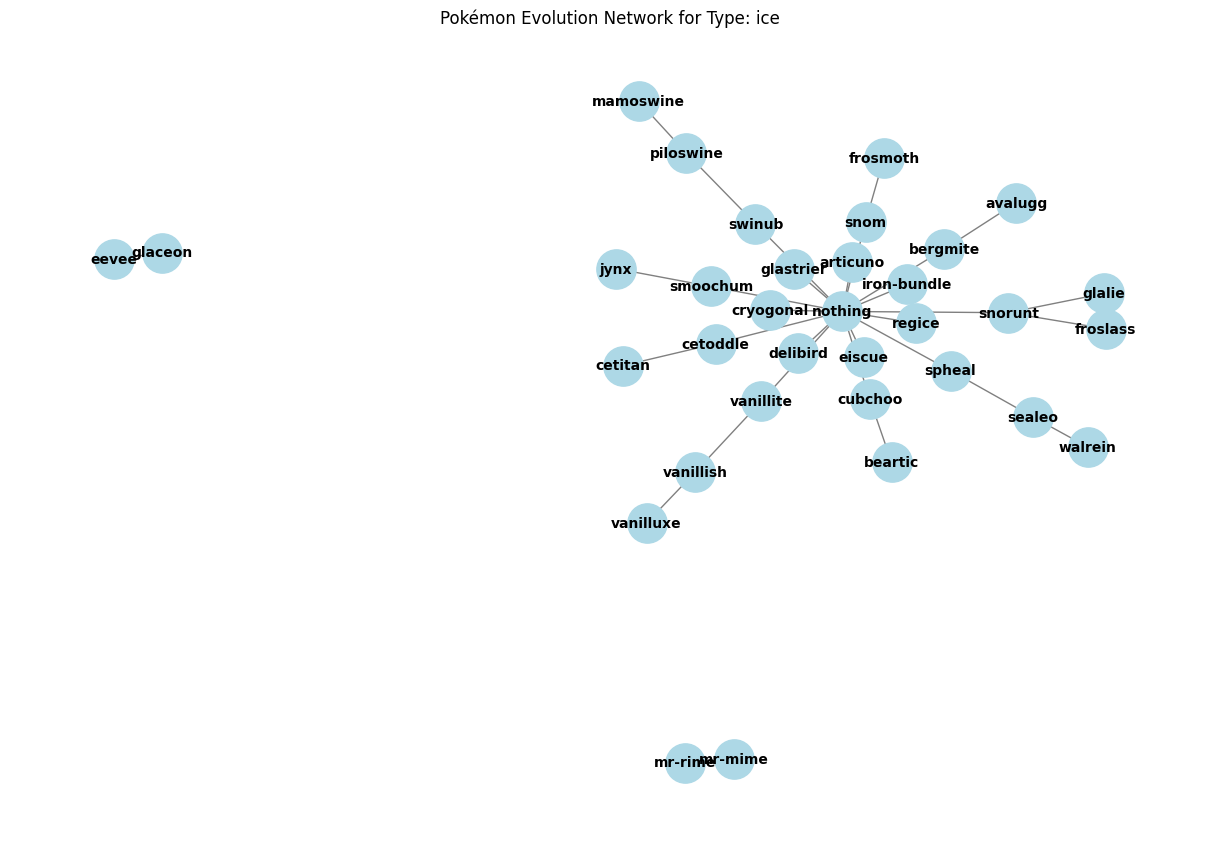

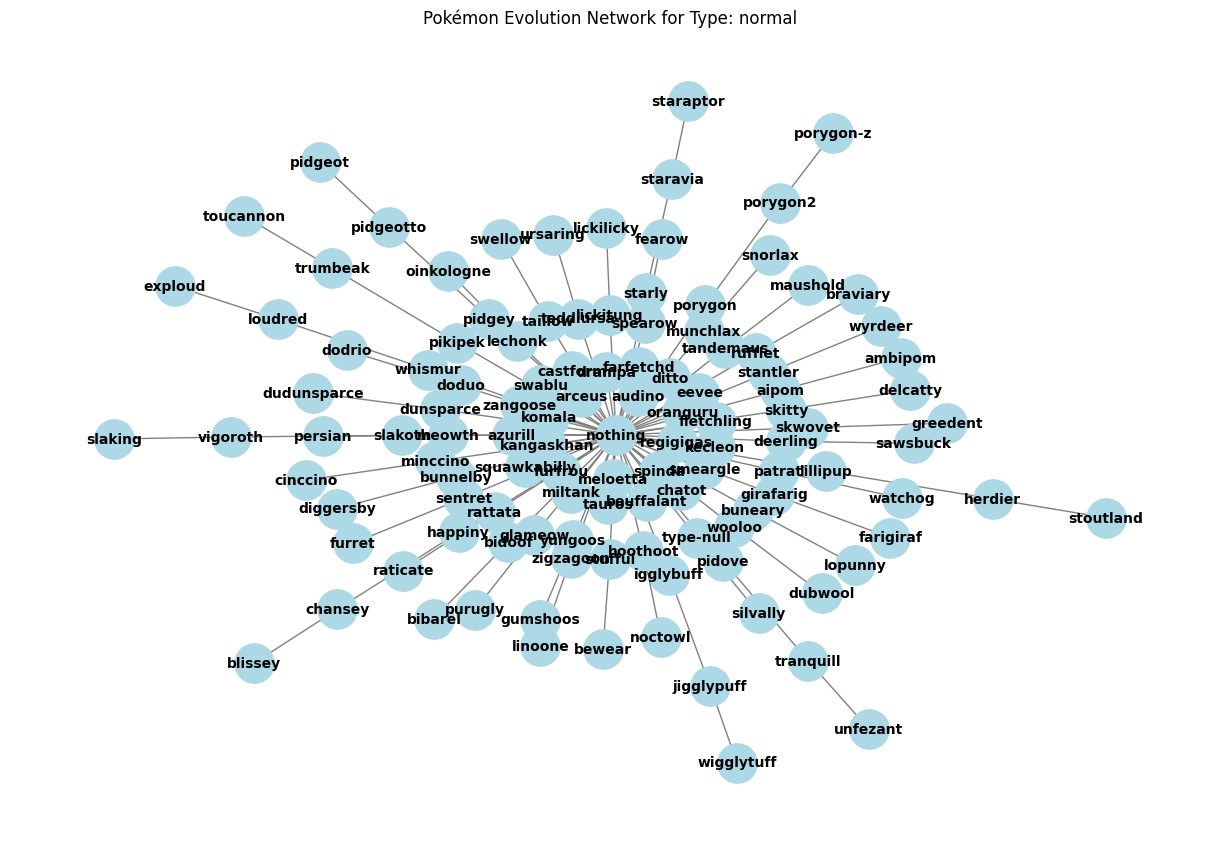

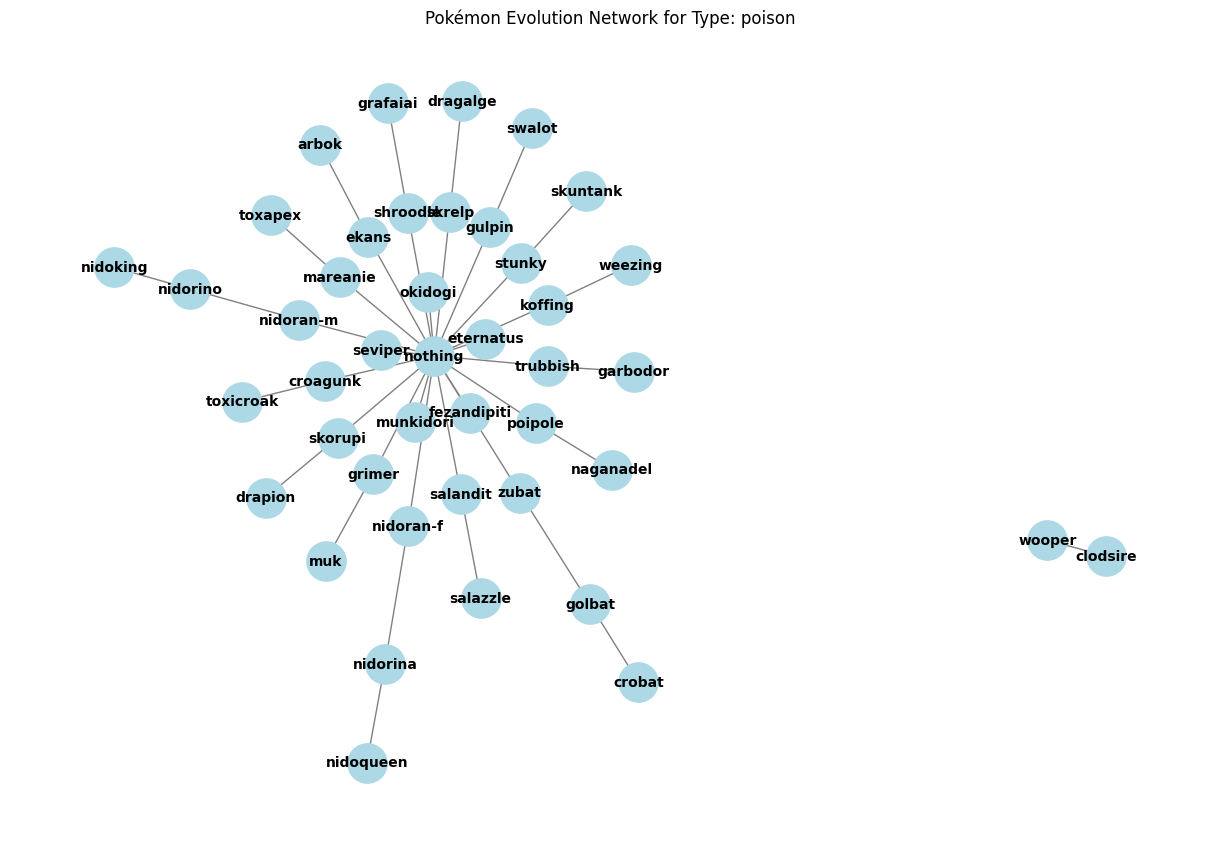

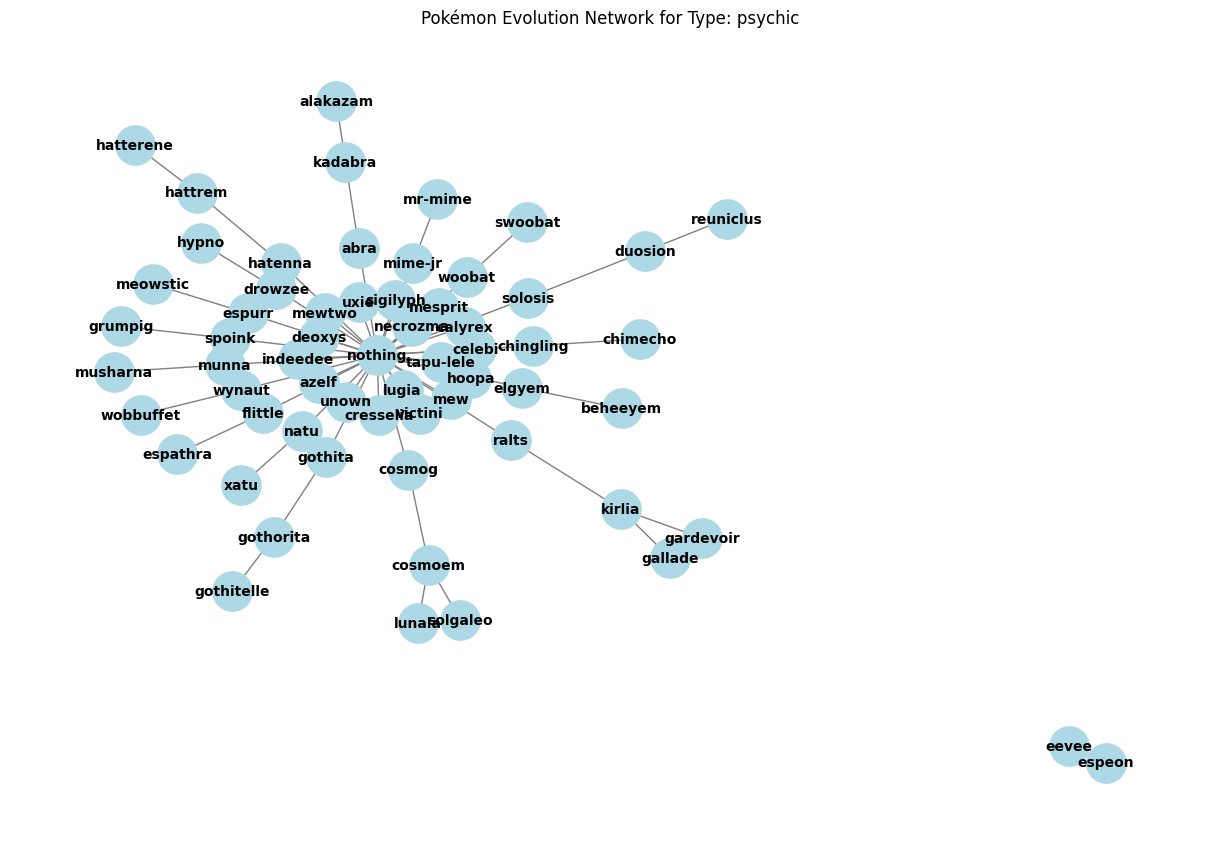

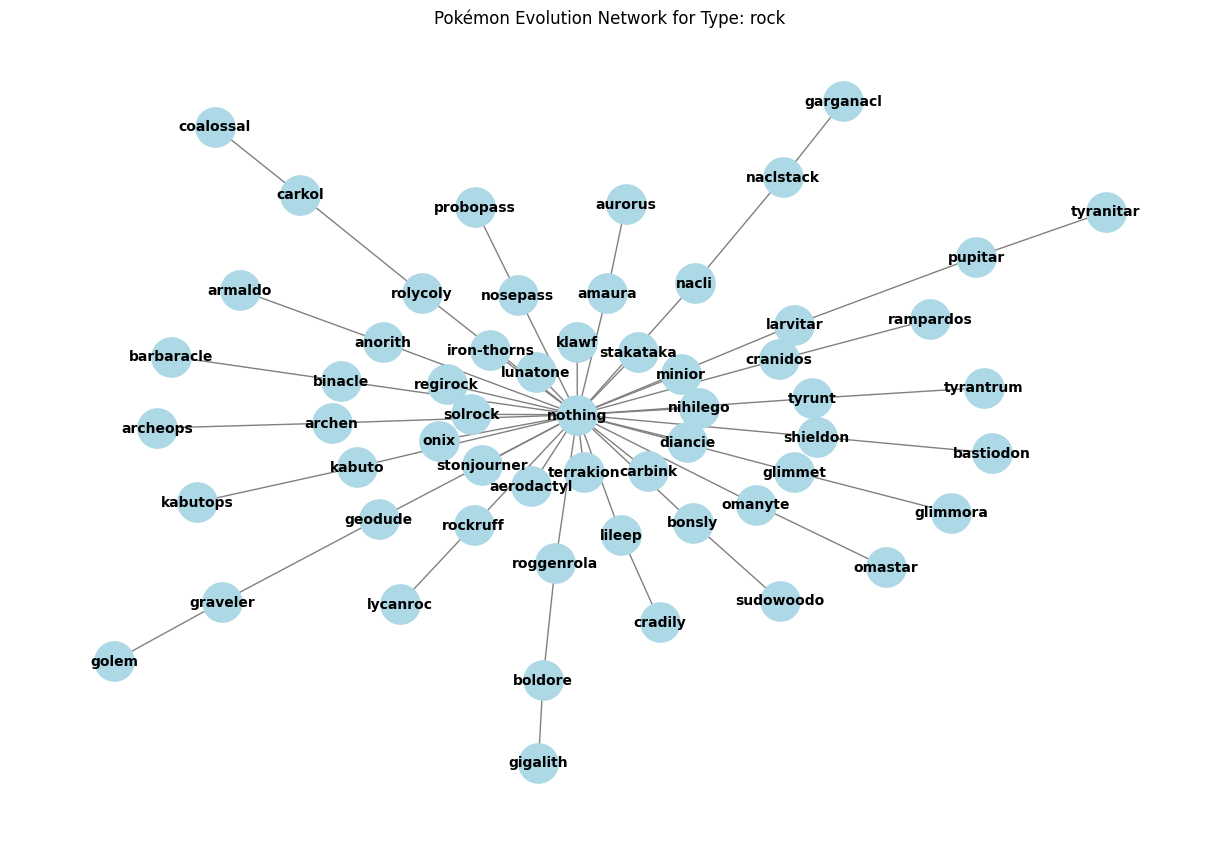

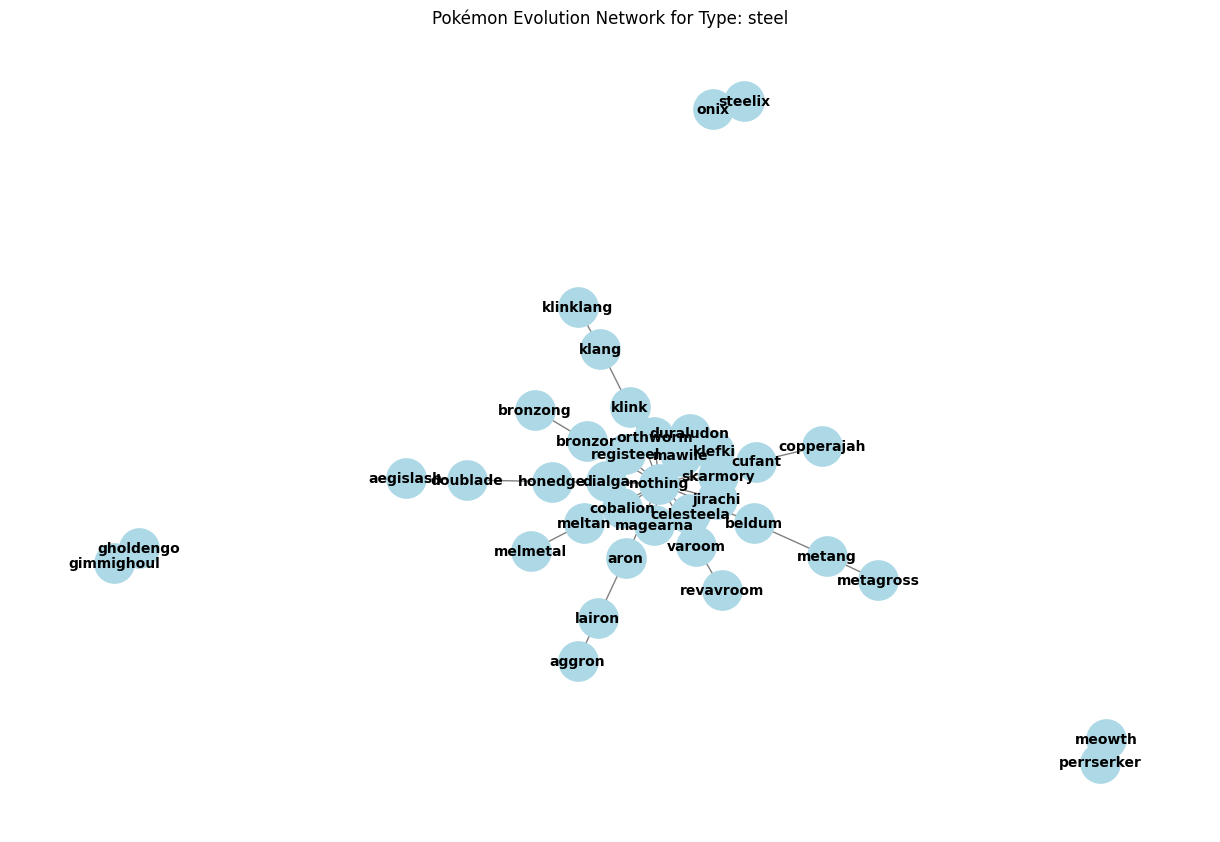

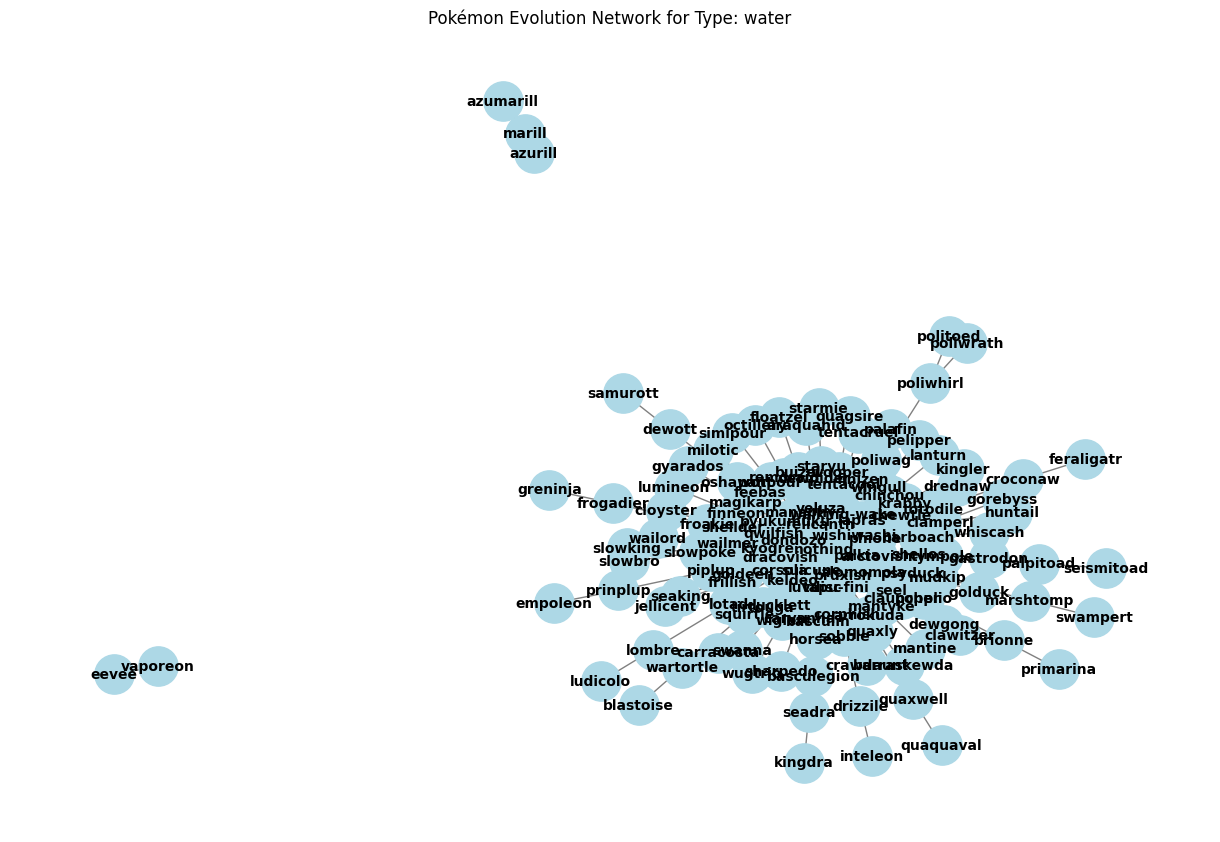

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

type_graphs = {}

grouped_by_type = df.groupby('type1')

for type1, group in grouped_by_type:
    G = nx.Graph()

    for _, row in group.iterrows():
        G.add_node(row['name'])

    for _, row in group.iterrows():
        if not pd.isnull(row['evolves_from']):
            G.add_edge(row['evolves_from'], row['name'])

    type_graphs[type1] = G

for type1, G in type_graphs.items():
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    plt.title(f'Pokémon Evolution Network for Type: {type1}')
    plt.show()



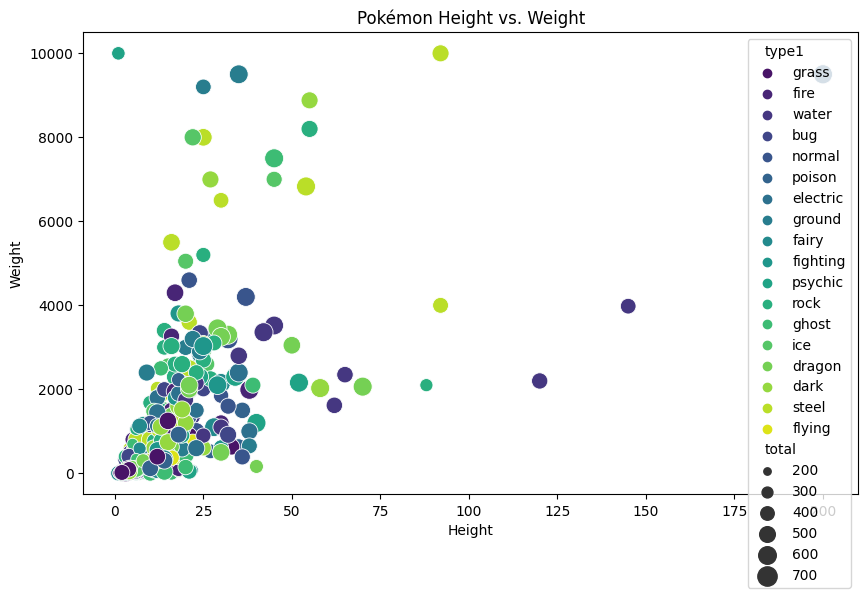

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=df, hue='type1', palette='viridis', size='total', sizes=(20, 200))
plt.title('Pokémon Height vs. Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


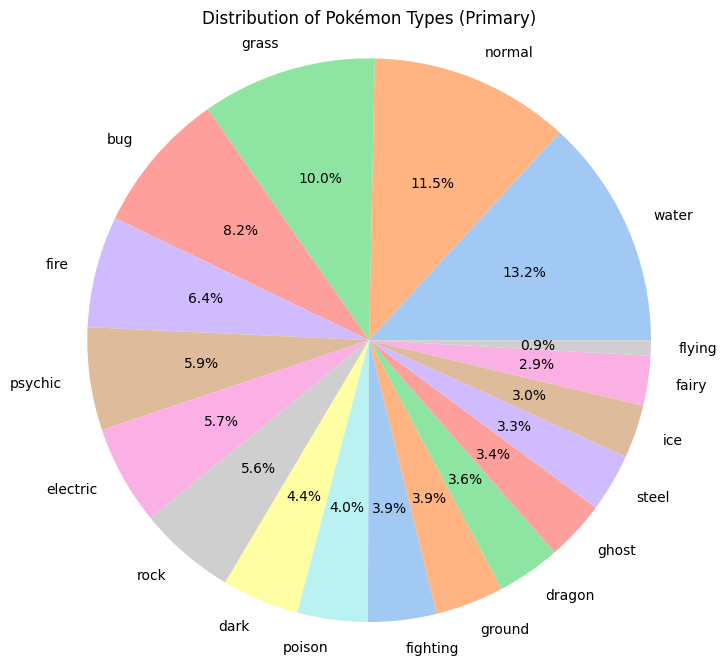

In [ ]:
import matplotlib.pyplot as plt
type_counts = df['type1'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Pokémon Types (Primary)')
plt.axis('equal')
plt.show()


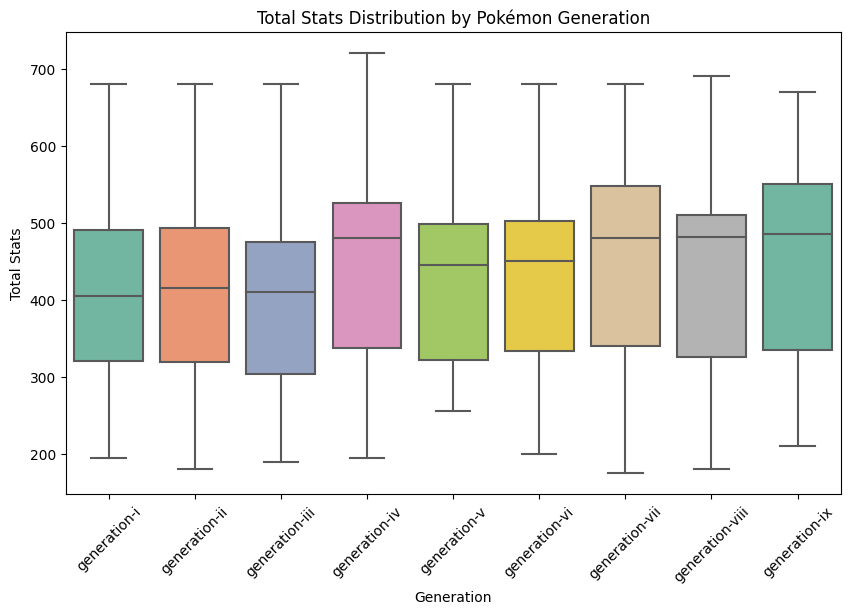

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='generation', y='total', data=df, palette='Set2')
plt.title('Total Stats Distribution by Pokémon Generation')
plt.xlabel('Generation')
plt.ylabel('Total Stats')
plt.xticks(rotation=45)
plt.show()



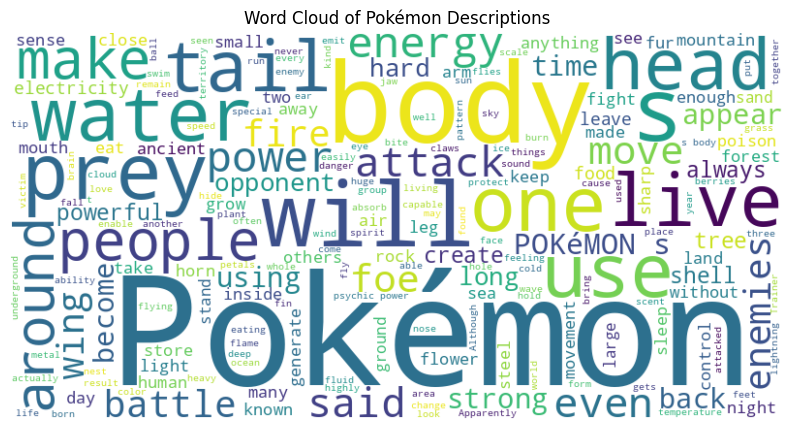

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(desc for desc in df['desc'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Pokémon Descriptions')
plt.show()


In [ ]:
import networkx as nx

avg_chain_lengths = {}

grouped_by_type = df.groupby('type1')

for type1, group in grouped_by_type:
    G = nx.Graph()

    for _, row in group.iterrows():
        G.add_node(row['name'])

    for _, row in group.iterrows():
        if not pd.isnull(row['evolves_from']):
            G.add_edge(row['evolves_from'], row['name'])

    shortest_paths = []
    for source in G.nodes:
        for target in G.nodes:
            if source != target:
                try:
                    shortest_paths.append(nx.shortest_path_length(G, source=source, target=target))
                except nx.NetworkXNoPath:
                    pass

    if shortest_paths:
        avg_length = sum(shortest_paths) / len(shortest_paths)
        avg_chain_lengths[type1] = avg_length
    else:
        avg_chain_lengths[type1] = 0

for type1, avg_length in avg_chain_lengths.items():
    print(f"Average Evolutionary Chain Length for Type {type1}: {avg_length:.2f}")


Average Evolutionary Chain Length for Type bug: 3.18
Average Evolutionary Chain Length for Type dark: 2.83
Average Evolutionary Chain Length for Type dragon: 3.14
Average Evolutionary Chain Length for Type electric: 2.92
Average Evolutionary Chain Length for Type fairy: 3.00
Average Evolutionary Chain Length for Type fighting: 2.90
Average Evolutionary Chain Length for Type fire: 3.21
Average Evolutionary Chain Length for Type flying: 2.38
Average Evolutionary Chain Length for Type ghost: 2.90
Average Evolutionary Chain Length for Type grass: 3.36
Average Evolutionary Chain Length for Type ground: 2.96
Average Evolutionary Chain Length for Type ice: 2.90
Average Evolutionary Chain Length for Type normal: 3.00
Average Evolutionary Chain Length for Type poison: 2.96
Average Evolutionary Chain Length for Type psychic: 3.01
Average Evolutionary Chain Length for Type rock: 2.92
Average Evolutionary Chain Length for Type steel: 2.85
Average Evolutionary Chain Length for Type water: 3.13


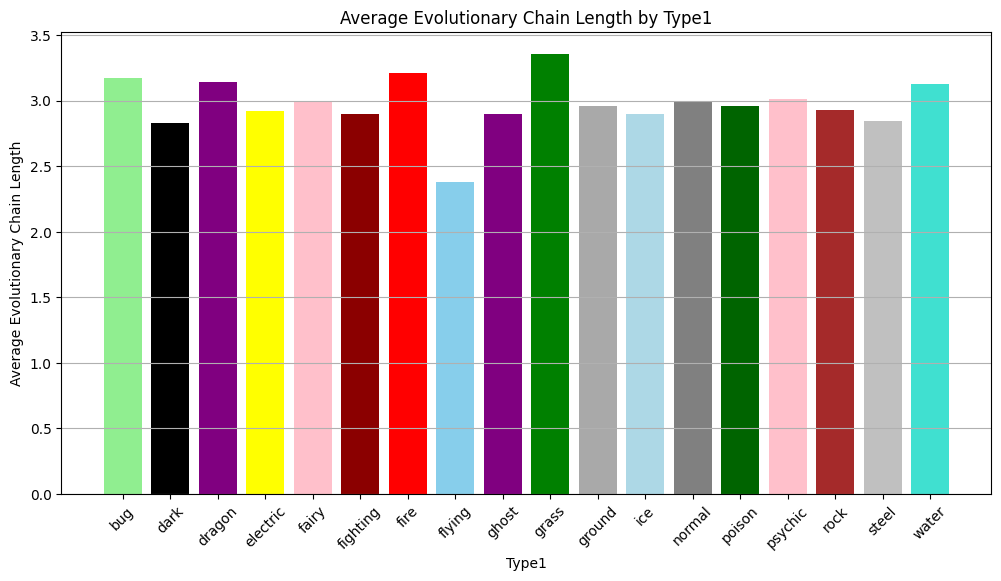

In [ ]:
import matplotlib.pyplot as plt

type_colors = {
    'normal': 'gray',
    'fire': 'red',
    'water': 'turquoise',
    'flying': 'skyblue',
    'bug': 'lightgreen',
    'dark': 'black',
    'dragon': 'purple',
    'electric': 'yellow',
    'fairy': 'pink',
    'fighting': 'darkred',
    'ghost': 'purple',
    'grass': 'green',
    'ground': 'darkgray',
    'ice': 'lightblue',
    'poison': 'darkgreen',
    'psychic': 'pink',
    'rock': 'brown',
    'steel': 'silver',
}

type1_list = list(avg_chain_lengths.keys())
avg_length_list = list(avg_chain_lengths.values())
colors = [type_colors[type1] for type1 in type1_list]

plt.figure(figsize=(12, 6))
plt.bar(type1_list, avg_length_list, color=colors)
plt.xlabel('Type1')
plt.ylabel('Average Evolutionary Chain Length')
plt.title('Average Evolutionary Chain Length by Type1')
plt.xticks(rotation=45)
plt.grid(axis='y')


plt.show()
